In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
from scipy.stats import linregress
import seaborn as sns

# Study data files
Lifestyle_data = "../Row-2-Group-Project/cdc_npao.csv"
Incidence_data = "../Row-2-Group-Project/heighest_lowest_Incidencerate_data.csv"

# Read CSV
raw_data = pd.read_csv(Lifestyle_data)
cancer_data = pd.read_csv(Incidence_data)


#Cleanup of LifeStyle Data
raw_data_df = pd.DataFrame(raw_data).rename(columns = {'YearStart':"Year", 'LocationDesc':"State", "Data_Value":"Percentage", "Class":"Category"})
del raw_data_df['YearEnd']
del raw_data_df['LocationAbbr']
del raw_data_df['Datasource']
del raw_data_df['Topic']
del raw_data_df['Data_Value_Unit']
del raw_data_df['Data_Value_Type']
del raw_data_df['Data_Value_Alt']
del raw_data_df['Data_Value_Footnote_Symbol']
del raw_data_df['Data_Value_Footnote']
del raw_data_df['Low_Confidence_Limit']
del raw_data_df['High_Confidence_Limit ']
del raw_data_df['Education']
del raw_data_df['Gender']
del raw_data_df['Income']
del raw_data_df['Race/Ethnicity']
del raw_data_df['GeoLocation']
del raw_data_df['ClassID']
del raw_data_df['TopicID']
del raw_data_df['Sample_Size']
del raw_data_df['Total']
del raw_data_df['Age(years)']
del raw_data_df['QuestionID']
del raw_data_df['DataValueTypeID']
del raw_data_df['LocationID']
del raw_data_df['StratificationCategoryId1']
del raw_data_df['StratificationCategory1']
del raw_data_df['Stratification1']
del raw_data_df['StratificationID1']
raw_data_df

# Merge our two data frames together
combined_data = pd.merge(raw_data_df, cancer_data, on="State")
combined_data=combined_data.dropna()

export_csv = cat_data.to_csv (r'../Row-2-Group-Project/combined_lifestyle_data.csv', header=True)


combined_data.head()



,Year,State,Category,Question,Percentage,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
0,2012,Alaska,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,30.3,413,2784,165,977,35
1,2011,Alaska,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,27.4,413,2784,165,977,35
2,2011,Alaska,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,28.0,413,2784,165,977,35
3,2011,Alaska,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,26.7,413,2784,165,977,35
4,2011,Alaska,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,28.8,413,2784,165,977,35


In [2]:
#Top States Category Overall Averages
years_selected = combined_data["Year"].isin(['2012','2013','2014','2015','2016'])
filter_topstates_data = combined_data[years_selected]
grouped_topstates_data = filter_topstates_data.groupby(["Category",])
Avg_topstates_Percent = (grouped_topstates_data["Percentage"]).mean()

cat_topstates_data = pd.DataFrame({"Top States Overall Averages":Avg_topstates_Percent})
export_csv = cat_topstates_data.to_csv (r'../Row-2-Group-Project/cat_topstates_data.csv', header=True)


cat_topstates_data



,Top States Overall Averages
Category,
Fruits and Vegetables,31.225211
Obesity / Weight Status,31.715191
Physical Activity,30.753409


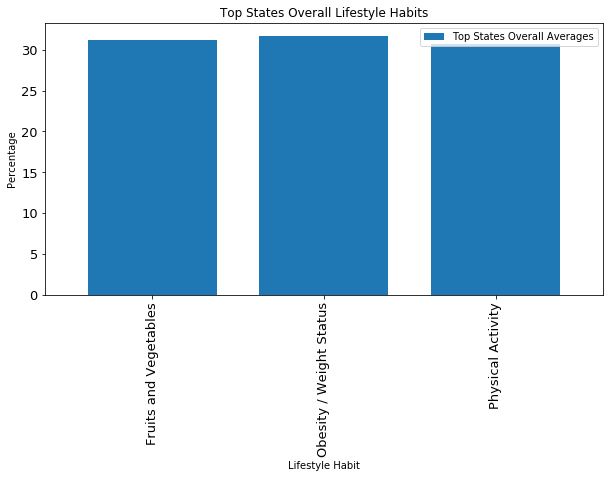

In [3]:
#plotting the bar graph - Nationwide
ax = cat_topstates_data.plot(kind='bar' ,figsize=(10,5), fontsize=13,width=0.75)
plt.legend(loc='best')
plt.title('Top States Overall Lifestyle Habits')
plt.xlabel('Lifestyle Habit')
plt.ylabel('Percentage')
plt.savefig('../Row-2-Group-Project/Top_States_Overall_Lifestyle_Bar_Chart.png',bbox_inches='tight')

In [4]:
#Creating a dataframe to gather data for bar chart
years_selected = combined_data["Year"].isin(['2012','2013','2014','2015','2016'])

#get physical activity data
cat_physical_chosen= raw_data_df["Category"].isin(['Physical Activity'])
filter_physical_data = combined_data[years_selected&cat_physical_chosen]
grouped_physical_data = filter_physical_data.groupby(["State",])
Avg_physical_Percent = (grouped_physical_data["Percentage"]).mean()

#get obesity data
cat_obesity_chosen= raw_data_df["Category"].isin(['Obesity / Weight Status'])
filter_obesity_data = combined_data[years_selected&cat_obesity_chosen]
grouped_obesity_data = filter_obesity_data.groupby(["State",])
Avg_obesity_Percent = (grouped_obesity_data["Percentage"]).mean()

#get nutrition data
cat_nutrition_chosen= raw_data_df["Category"].isin(['Fruits and Vegetables'])
filter_nutrition_data = combined_data[years_selected&cat_nutrition_chosen]
grouped_nutrition_data = filter_nutrition_data.groupby(["State",])
Avg_nutrition_Percent = (grouped_nutrition_data["Percentage"]).mean()


#Setting up the dataframe
cat_data = pd.DataFrame({"Physical Activity":Avg_physical_Percent,
                        "Obesity / Weight Status":Avg_obesity_Percent,
                        "Fruits and Vegetables":Avg_nutrition_Percent})
export_csv = cat_data.to_csv (r'../Row-2-Group-Project/cat_data.csv', header=True)
cat_data.dropna()


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,Physical Activity,Obesity / Weight Status,Fruits and Vegetables
State,,,
Alaska,31.507261,31.884259,35.255769
Arizona,31.149527,32.808491,28.417308
California,30.229231,31.951887,28.033333
Colorado,33.247302,28.729767,25.411009
Delaware,30.825342,32.540201,32.753000
Kentucky,32.812795,33.222059,28.348000
Louisiana,34.046875,31.149215,33.945455
Maine,31.367944,30.293782,28.629167
Nevada,30.662136,33.915842,28.628000


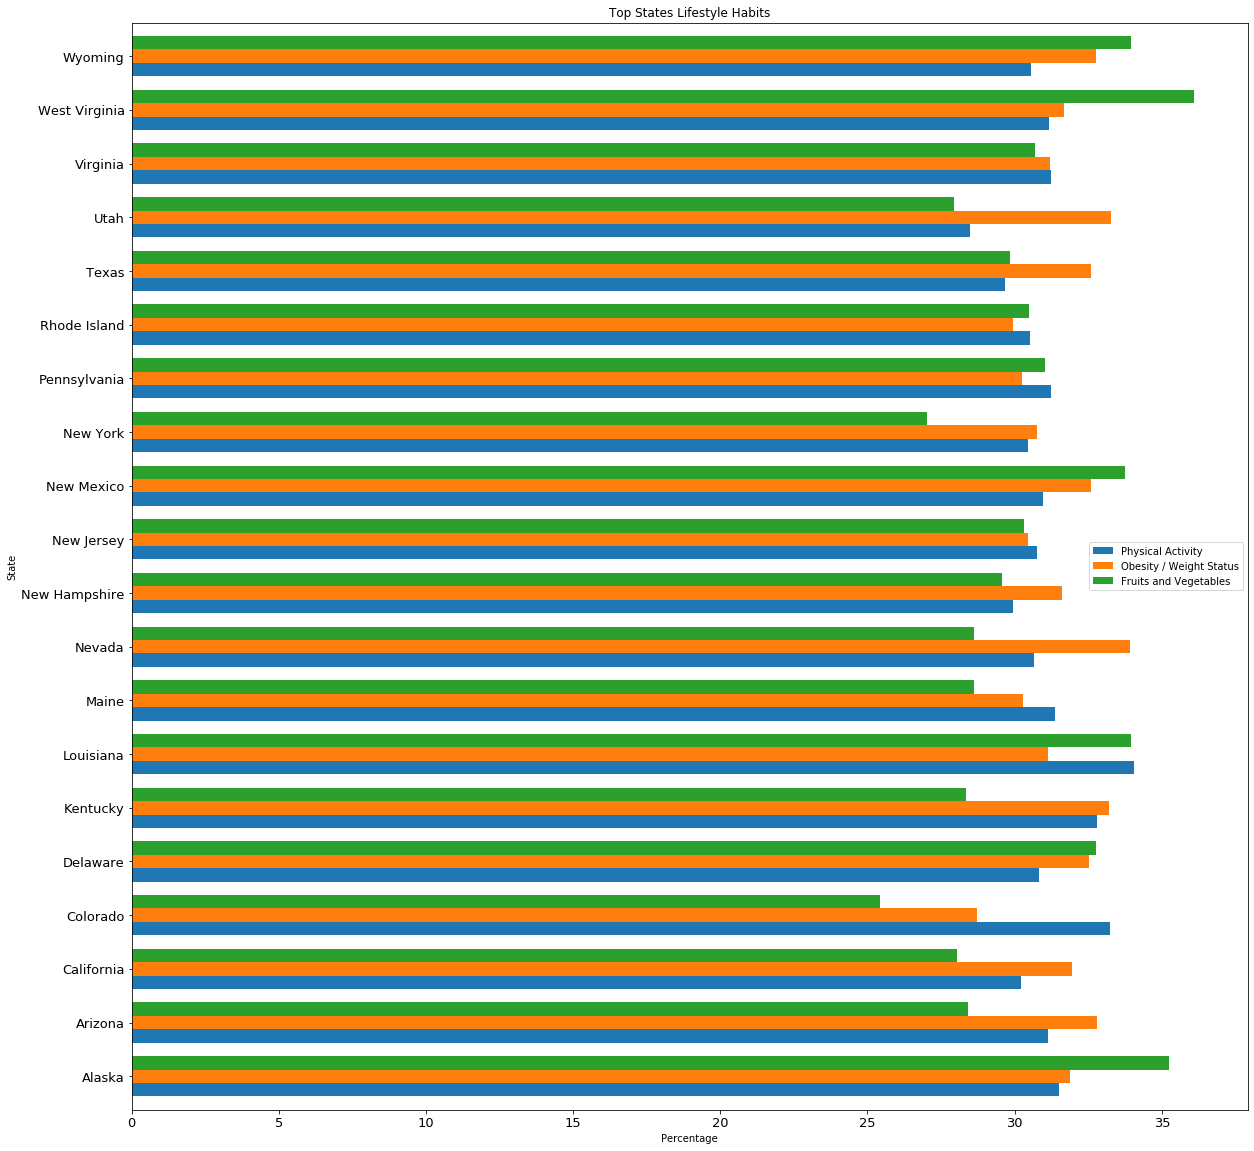

In [5]:
#plotting the bar graph
ax = cat_data.plot(kind='barh' ,figsize=(20,20), fontsize=13,width=0.75)
plt.legend(loc='best')
plt.title('Top States Lifestyle Habits')
plt.xlabel('Percentage')
plt.savefig('../Row-2-Group-Project/Top_States_Lifestyle_Bar_Chart.png',bbox_inches='tight')

In [6]:
#Creating a dataframe to gather data to calculate correlations
Incidence_rate = combined_data.groupby(["State"])["Incidence Rate"].mean()

corr_cat_data = pd.DataFrame({"Physical Activity":Avg_physical_Percent,
                        "Obesity / Weight Status":Avg_obesity_Percent,
                        "Fruits and Vegetables" :Avg_nutrition_Percent,
                        "Incidence Rate": Incidence_rate})
export_csv = corr_cat_data.to_csv (r'../Row-2-Group-Project/corr_cat_data.csv', header=True)
corr_cat_data.dropna()


,Physical Activity,Obesity / Weight Status,Fruits and Vegetables,Incidence Rate
State,,,,
Alaska,31.507261,31.884259,35.255769,413
Arizona,31.149527,32.808491,28.417308,387
California,30.229231,31.951887,28.033333,405
Colorado,33.247302,28.729767,25.411009,401
Delaware,30.825342,32.540201,32.753000,498
Kentucky,32.812795,33.222059,28.348000,521
Louisiana,34.046875,31.149215,33.945455,481
Maine,31.367944,30.293782,28.629167,476
Nevada,30.662136,33.915842,28.628000,393


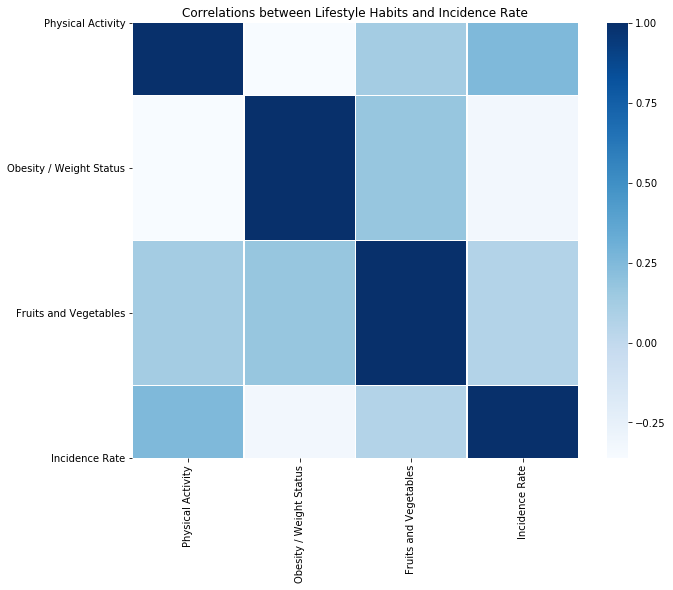

In [7]:
#Top States Overall Correlations (Top States with data)
fig, ax = plt.subplots(figsize=(10,8))
akws = {"ha": 'left',"va": 'bottom'}

sns.heatmap(corr_cat_data.corr(method='pearson'), annot=False, annot_kws = akws,fmt='.2f', 
            cmap=plt.get_cmap('Blues'), cbar=True, ax=ax,linewidths = 0.5,)

ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
plt.title("Correlations between Lifestyle Habits and Incidence Rate")
plt.savefig('../Row-2-Group-Project/Correlation_Chart.png',bbox_inches='tight')
plt.show()


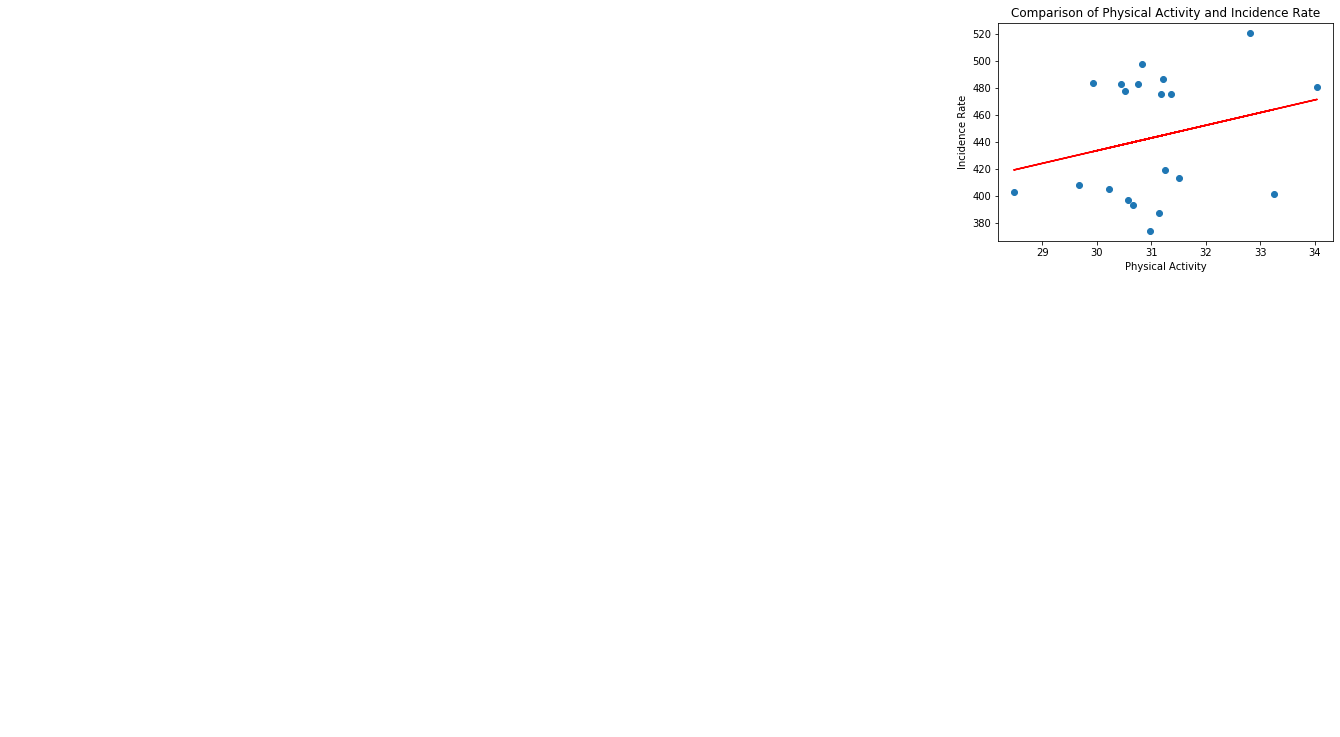

In [8]:
#Scatter plot of Physical Activity V Incidence Rate



x_values = cat_data["Physical Activity"]
y_values = corr_cat_data["Incidence Rate"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,5),fontsize=15,color="red")
plt.title('Comparison of Physical Activity and Incidence Rate')
plt.xlabel('Physical Activity')
plt.ylabel('Incidence Rate')
plt.savefig('../Row-2-Group-Project/Physical_Activity_Incidence_Scatter_Chart.png')
plt.show()





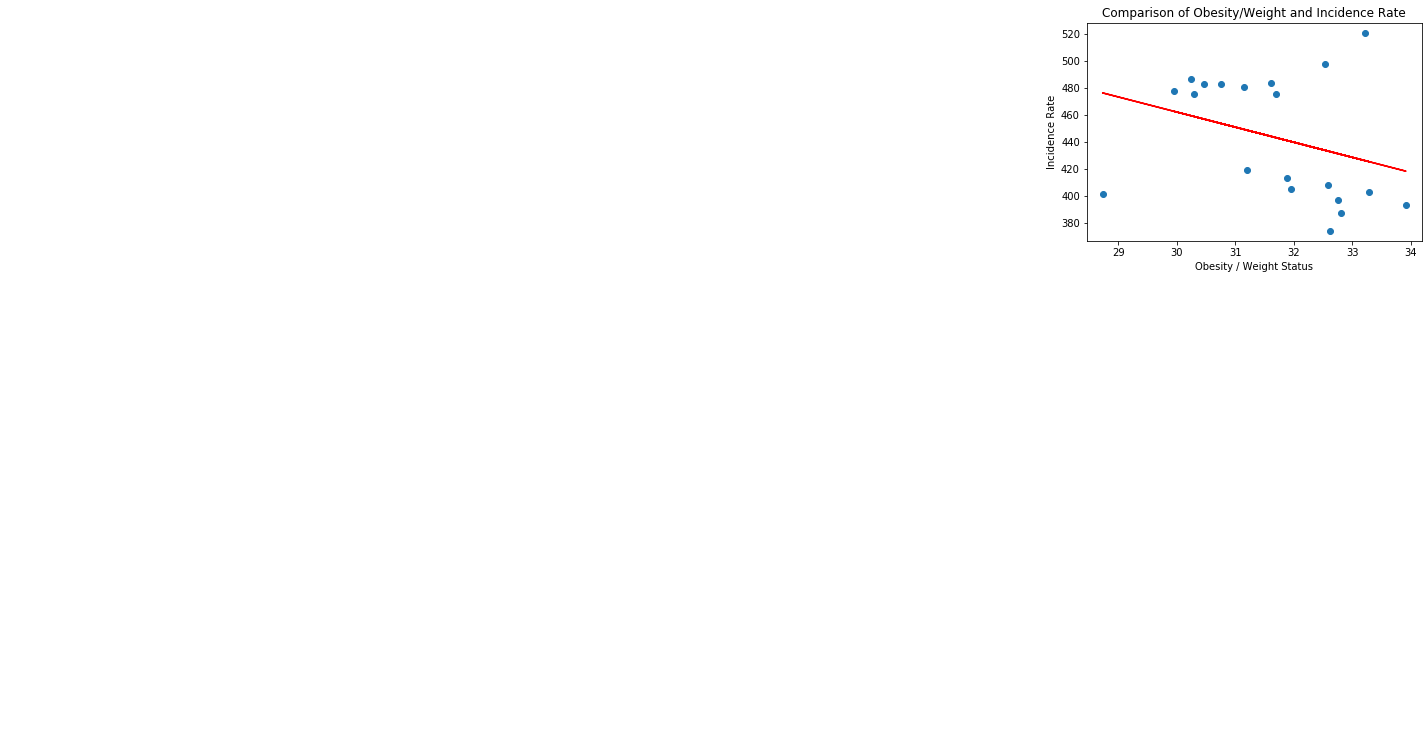

In [9]:
#Scatter plot of Obesity / Weight Status V Incidence Rate


x_values = cat_data["Obesity / Weight Status"]
y_values = corr_cat_data["Incidence Rate"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,5),fontsize=15,color="red")
plt.title('Comparison of Obesity/Weight and Incidence Rate')
plt.xlabel('Obesity / Weight Status')
plt.ylabel('Incidence Rate')
plt.savefig('../Row-2-Group-Project/Obesity_Incidence_Scatter_Chart.png')
plt.show()



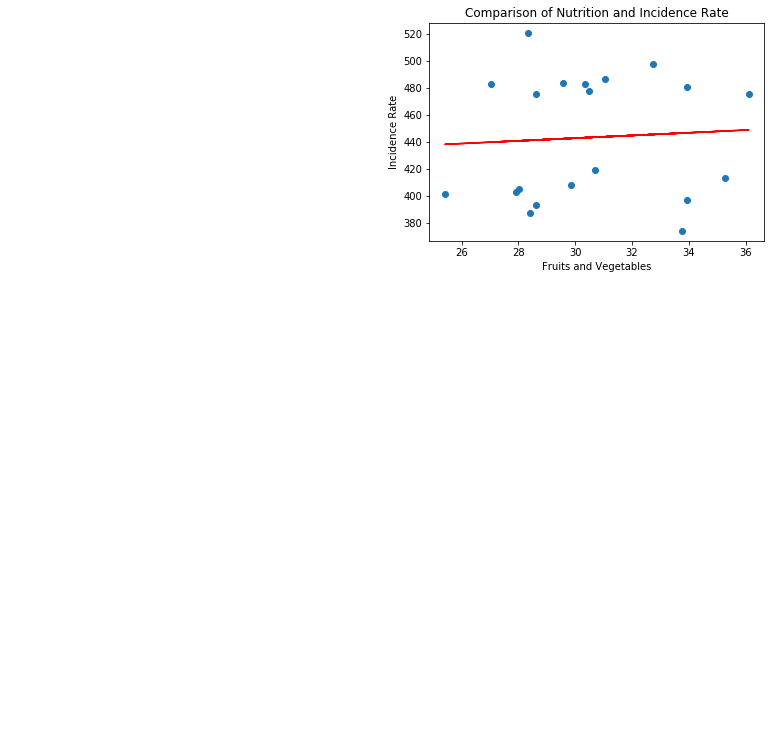

In [10]:
#Scatter plot of Fruits and Vegetables V Incidence Rate


x_values = cat_data["Fruits and Vegetables"]
y_values = corr_cat_data["Incidence Rate"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,5),fontsize=15,color="red")
plt.title('Comparison of Nutrition and Incidence Rate')
plt.xlabel('Fruits and Vegetables')
plt.ylabel('Incidence Rate')
plt.savefig('../Row-2-Group-Project/Nutrition_Incidence_Scatter_Chart.png')
plt.show()

